In [ ]:
X1, X2, X3

In [ ]:
2 hidden layers

2 nodes, 2 nodes

In [ ]:
h1_1 <0: 0
h1_1 >= 0: h1_1

In [ ]:

h1_1 = a1_1*x1 + a1_2*x2 + a1_3*x3 + b1_1
activation_function

h1_2 = a2_1*x1 + a2_2*x2 + a2_3*x3 + b1_2


In [ ]:

h2_1 = c1_1*h1_1 + c1_2*h1_2 + b2_1
h2_2 = c2_1*h1_1 + c2_2*h1_2 + b2_2


In [ ]:


h2_1 = c1_1*(a1_1*x1 + a1_2*x2 + a1_3*x3 + b1_1) + c1_2*h1_2 + b2_1

 = c1_1*a1_1*x1 + c1_1*a1_2*x2
 = d1_1*x1

In [ ]:

sigmoid() : 0 and 1



In [2]:
import tensorflow as tf
import tensorflow.keras.layers as L

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
FILE_PATH = "creditcard.csv"
SEED =123

In [5]:
data = pd.read_csv(FILE_PATH)

In [6]:
data.shape

(284807, 31)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data = data.drop("Time", axis = 1)

In [9]:
DEP_DRIVER = "Class"

In [14]:
data[DEP_DRIVER].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:

X = data.drop(DEP_DRIVER, axis=1)
Y = data[DEP_DRIVER]


In [11]:
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size = 0.2, random_state = SEED)

In [12]:

sc = StandardScaler()
sc.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
X_train_std = sc.transform(X_train)
X_validation_std = sc.transform(X_validation)

### Building model in Keras

### Model Architecture

In [ ]:
def build_model():
    model = tf.keras.models.Sequential(
                                [L.Dense(32, activation='tanh', input_shape = (29,)),
                                  L.Dense(16, activation='tanh'),
                                  L.Dense(1, activation='sigmoid')])
    
    optimizer = tf.keras.optimizers.Adam(lr = 0.001)
    #optimizer = tf.keras.optimizers.SGD(lr = 0.001)
    loss = tf.keras.losses.BinaryCrossentropy()
    
    model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['accuracy'])
    
    return model

In [17]:
model = tf.keras.models.Sequential(
                            [L.Dense(3, activation='tanh', input_shape = (3,)),
                              L.Dense(2, activation='tanh'),
                              L.Dense(1, activation='sigmoid')])

In [18]:
(3*3 + 3) + (3*2 + 2) + (2*1 + 1)

23

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = build_model()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [20]:
model = tf.keras.models.Sequential(
                                [L.Dense(32, activation='tanh', input_shape = (29,)),
                                  L.Dense(16, activation='tanh'),
                                  L.Dense(1, activation='sigmoid')])

### Optimizer

In [21]:
optimizer = tf.keras.optimizers.Adam(lr = 0.001)
#optimizer = tf.keras.optimizers.SGD(lr = 0.001)

### Loss function

In [22]:
loss = tf.keras.losses.BinaryCrossentropy()

### Compile

In [23]:
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['accuracy'])

### Check model architecture

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                960       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


### Calulcate Parameters

### Train the model

In [25]:
model.fit(X_train_std,
          y_train,
          batch_size=128, 
          epochs=10,
          verbose = 1,
         validation_data=(X_validation_std, y_validation))

Train on 227845 samples, validate on 56962 samples
Epoch 1/10
227845/227845 [==============================] - 3s 12us/sample - loss: 0.0391 - accuracy: 0.9904 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 2/10
227845/227845 [==============================] - 2s 10us/sample - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 3/10
227845/227845 [==============================] - 2s 10us/sample - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 4/10
227845/227845 [==============================] - 2s 9us/sample - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 5/10
227845/227845 [==============================] - 2s 9us/sample - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 6/10
227845/227845 [==============================] - 2s 10us/sample - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0037 - val_accuracy: 0.9989
Epoch 7/10
227845/227845 [===================

In [ ]:
model.fit(X_train_std,
          y_train,
          batch_size=128, 
          epochs=10,
          verbose = 1,
         validation_data=(X_validation_std, y_validation))

### Checking model performance

In [26]:
history = model.fit(X_train_std,
          y_train,
          batch_size=128,
          epochs=30,
          verbose = 0,
         validation_data=(X_validation_std, y_validation))

In [27]:
history.history

{'loss': [0.0017346472404883252,
  0.001622629188369741,
  0.001597070411663146,
  0.0015778547228551827,
  0.0015021178725056865,
  0.001497154492587144,
  0.001413224946407521,
  0.0013360480456608699,
  0.001316627897938679,
  0.0011858371404287076,
  0.001250577291247185,
  0.001140873687998846,
  0.0011918951757178998,
  0.001177222175808496,
  0.0010466525604888948,
  0.0010327326244547047,
  0.0009666043877902138,
  0.0009878337624169462,
  0.0009642255335435609,
  0.0009328015617550829,
  0.0008677935789030014,
  0.000839229170445084,
  0.00087777335210992,
  0.0008812879901970448,
  0.0007645577885427862,
  0.0007525304347359601,
  0.0007601790787997366,
  0.0007431311149475923,
  0.000721796742058922,
  0.0007824426218314526],
 'accuracy': [0.99962693,
  0.9996533,
  0.99966645,
  0.9996225,
  0.9996884,
  0.9996752,
  0.99969715,
  0.9997059,
  0.9997059,
  0.9997718,
  0.9997059,
  0.99974984,
  0.9997235,
  0.99973226,
  0.9997542,
  0.999763,
  0.9998025,
  0.99978936,
  

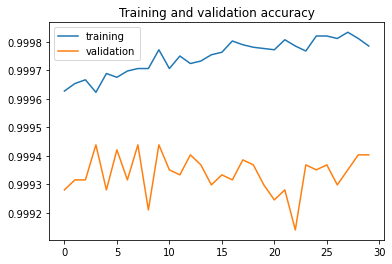

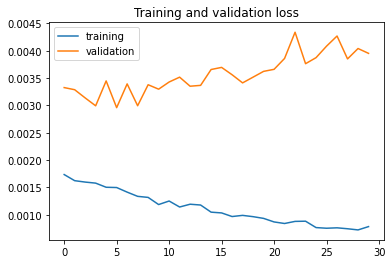

In [28]:

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


plt.plot  ( epochs,     acc ,label='training')
plt.plot  ( epochs, val_acc,label='validation' )
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs,     loss , label='training')
plt.plot  ( epochs, val_loss , label='validation')
plt.title ('Training and validation loss'   )
plt.legend()
plt.show()

In [33]:
import numpy as np

In [39]:
model.predict(X_validation_std)

array([[3.3015880e-07],
       [4.3595841e-07],
       [1.1352874e-05],
       ...,
       [4.9198576e-07],
       [9.6431427e-07],
       [1.4711753e-05]], dtype=float32)

In [40]:
model.evaluate(X_validation_std, y_validation)

56962/56962 [==============================] - 1s 19us/sample - loss: 0.0040 - accuracy: 0.9994


[0.003951936986289186, 0.9994031]

In [38]:
model.predict(np.array(range(29)).reshape(1,29))

array([[0.00080351]], dtype=float32)

### Callbacks

In [ ]:
checkpoint_path = "./training2/cp-{epoch:04d}.ckpt"

In [ ]:
checkpoint_path = "./training2/cp-{epoch:04d}.ckpt"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                     monitor='val_loss', 
                                     verbose=0, 
                                     save_weights_only=True, 
                                     save_freq='epoch')

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
model.fit(X_train_std,
          y_train,
          batch_size=128, 
          epochs=2,
          verbose = 1,
         validation_data=(X_validation_std, y_validation),
         callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
#model.load_weights(checkpoint_filepath)

In [ ]:
new_model = build_model()

In [ ]:
new_model.summary()

In [ ]:
new_model.load_weights("./training2/cp-{epoch:04d}.ckpt".format(epoch=2))

In [29]:
loss, acc = model.evaluate(X_validation_std,  y_validation, verbose=1)
#print('Restored model, accuracy: {:5.2f}%'.format(100*acc))
print('model, accuracy: {:5.2f}%'.format(100*acc))

56962/56962 [==============================] - 1s 18us/sample - loss: 0.0040 - accuracy: 0.9994
model, accuracy: 99.94%


In [ ]:
loss, acc = new_model.evaluate(X_train_std,  y_train, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

In [ ]:
import numpy as np

In [ ]:
new_obs = np.random.random(size=(29))

In [ ]:
new_obs

In [ ]:
new_obs.shape

In [ ]:
new_model.predict([[0.88226539, 0.50008984, 0.86158959, 0.023153  , 0.2662461 ,
       0.30361379, 0.13188233, 0.16325545, 0.5090592 , 0.25650365,
       0.86119785, 0.5836758 , 0.91921402, 0.24484113, 0.37231449,
       0.06100179, 0.78504055, 0.03717705, 0.16082321, 0.5662642 ,
       0.23487959, 0.19478872, 0.97542478, 0.6204025 , 0.43309188,
       0.29145127, 0.82469414, 0.65328207, 0.85764348]])

In [ ]:
checkpoint_path = "./training3/cp-{epoch:04d}.ckpt"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                     monitor='val_loss', 
                                     verbose=0, 
                                     save_best_only=False,
                                     save_weights_only=False, 
                                     save_freq='epoch')

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.

model.reset_states()
model.fit(X_train_std,
          y_train,
          batch_size=128, 
          epochs=3,
          verbose = 1,
         validation_data=(X_validation_std, y_validation),
         callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
#model.load_weights(checkpoint_filepath)

In [ ]:
new_model = tf.keras.models.load_model("./training3/cp-{epoch:04d}.ckpt".format(epoch=2))


### Tensorboard

In [ ]:
import datetime

In [ ]:
%load_ext tensorboard

In [ ]:
!rm -rf ./logs1/

In [ ]:

log_dir = "logs1/fit1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                                                      histogram_freq=1)


In [ ]:
model = tf.keras.models.Sequential(
                            [L.Dense(32, activation='tanh', input_shape = (29,), name="dense_32"),
                              L.Dense(16, activation='tanh', name="dense_16"),
                              L.Dense(1, activation='sigmoid', name="dense_sigmoid")])

optimizer = tf.keras.optimizers.Adam(lr = 0.001)
#optimizer = tf.keras.optimizers.SGD(lr = 0.001)
loss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=optimizer,
         loss=loss,
         metrics=['accuracy'])


In [ ]:
model.fit(X_train_std,
          y_train,
          batch_size=128, 
          epochs=10,
          verbose = 1,
         validation_data=(X_validation_std, y_validation),
         callbacks=[model_checkpoint_callback, tensorboard_callback])

In [ ]:
0.01*0.03

In [1]:
0.01*0.03*0.01*0.03*0.01*0.03*12

3.2399999999999997e-10

In [ ]:
0.1*0.1*0.1*0.1

In [ ]:
0.01*0.03

In [ ]:
0.01*0.03*0.9*0.002*0.0002